In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
df = fetch_openml("titanic", version = 1, as_frame=True)["data"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [5]:
df.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,True,False,True,True,True


In [6]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
import seaborn as sns 

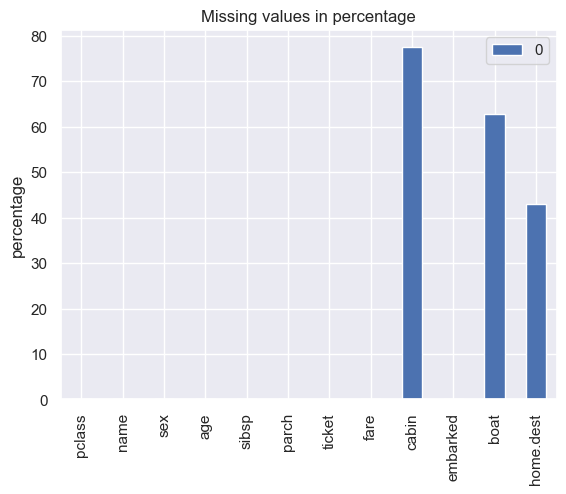

In [20]:
sns.set()
miss_val_per = pd.DataFrame((df.isnull().sum()/len(df))*100)
miss_val_per.plot(kind='bar',title = 'Missing values in percentage',ylabel = 'percentage')
plt.show()

In [10]:
print('size of the dataset: {df.shape}')

size of the dataset: {df.shape}


In [11]:
df.drop(['body'],axis =1,inplace=True)
print(f"Size of the dataset after dropping a feature: {df.shape}")

Size of the dataset after dropping a feature: (1309, 12)


# Value Imputing

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
print(f"Number of Null values before imputing{df.age.isnull().sum()}")

Number of Null values before imputing263


In [15]:
imp = SimpleImputer(strategy = 'mean')
df['age'] = imp.fit_transform(df[['age']])
print(f'Number of null values in age column after imputation:{df.age.isnull().sum()}')
                        

Number of null values in age column after imputation:0


In [19]:
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype =='float64' or df[col].dtype == 'int64' or df[col].dtype == 'int32':
           strategy = 'mean'
        else:
            strategy = 'most_frequent'
            
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] ={'missing_values':missing_values, 'strategy':strategy}
    return parameters
get_parameters(df)
            

{'fare': {'missing_values': nan, 'strategy': 'mean'},
 'cabin': {'missing_values': None, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': None, 'strategy': 'most_frequent'},
 'home.dest': {'missing_values': None, 'strategy': 'most_frequent'}}

In [21]:
parameters = get_parameters(df)

In [24]:
for col,param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values = missing_values, strategy = strategy)
    df[col] = imp.fit_transform(df[[col]])

In [25]:
df.isnull().sum()

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

In [26]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"


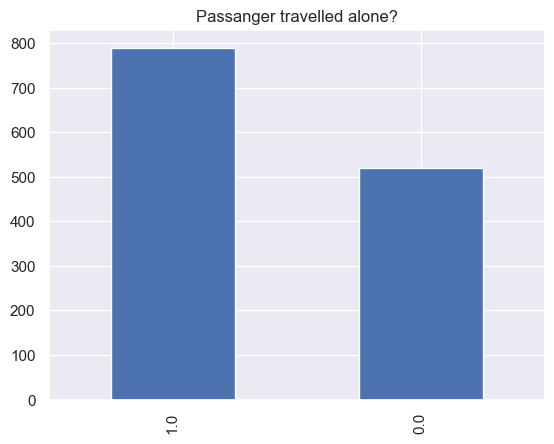

In [34]:
df['family'] = df['sibsp'] + df['parch']
df.loc[df['family']>0, 'travelled_alone']=0
df.loc[df['family']==0, 'travelled_alone']=1
df['travelled_alone'].value_counts().plot(title='Passanger travelled alone?', kind = 'bar')
plt.show()

# Data Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder
df[['female','male']] = OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


In [43]:
df['sex'] = OneHotEncoder().fit_transform(df[['sex']]).toarray()[:,1]

In [44]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,family,travelled_alone,traveled_alone,female,male
0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",0.0,1.0,1.0,1.0,0.0
1,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",3.0,0.0,NaN,0.0,1.0
2,1.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3.0,0.0,NaN,1.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3.0,0.0,NaN,0.0,1.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3.0,0.0,NaN,1.0,0.0


# Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
num_cols = df.select_dtypes(include=['int64','float64','int32']).columns
print(num_cols)

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'family',
       'travelled_alone', 'traveled_alone', 'female', 'male'],
      dtype='object')


In [50]:
ss = StandardScaler()

In [52]:
df[num_cols] = ss.fit_transform(df[num_cols])
df[num_cols].describe()

,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,traveled_alone,female,male
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,790.0,1.309000e+03,1.309000e+03
mean,4.995749e-15,1.231338e-15,3.094672e-16,-1.053143e-15,7.090500e-17,8.422513e-16,-3.562213e-17,1.484086e-15,0.0,-1.231338e-15,1.231338e-15
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,0.0,1.000382e+00,1.000382e+00
min,-1.546098e+00,-1.344995e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-6.437751e-01,-5.583461e-01,-1.233758e+00,0.0,-7.434969e-01,-1.344995e+00
25%,-3.520907e-01,-1.344995e+00,-6.119712e-01,-4.790868e-01,-4.449995e-01,-4.911082e-01,-5.583461e-01,-1.233758e+00,0.0,-7.434969e-01,-1.344995e+00
50%,8.419164e-01,7.434969e-01,2.758687e-16,-4.790868e-01,-4.449995e-01,-3.643001e-01,-5.583461e-01,8.105319e-01,0.0,-7.434969e-01,7.434969e-01
75%,8.419164e-01,7.434969e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-3.906640e-02,7.335229e-02,8.105319e-01,0.0,1.344995e+00,7.434969e-01
max,8.419164e-01,7.434969e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.262219e+00,5.758637e+00,8.105319e-01,0.0,1.344995e+00,7.434969e-01


In [53]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols]

,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,traveled_alone,female,male
0,0.0,0.0,0.361169,0.000,0.000000,0.412503,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.009395,0.125,0.222222,0.295806,0.3,0.0,NaN,0.0,1.0
2,0.0,0.0,0.022964,0.125,0.222222,0.295806,0.3,0.0,NaN,1.0,0.0
3,0.0,1.0,0.373695,0.125,0.222222,0.295806,0.3,0.0,NaN,0.0,1.0
4,0.0,0.0,0.311064,0.125,0.222222,0.295806,0.3,0.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.0,0.179540,0.125,0.000000,0.028213,0.1,0.0,NaN,1.0,0.0
1305,1.0,0.0,0.372206,0.125,0.000000,0.028213,0.1,0.0,NaN,1.0,0.0
1306,1.0,1.0,0.329854,0.000,0.000000,0.014102,0.0,1.0,0.0,0.0,1.0
1307,1.0,1.0,0.336117,0.000,0.000000,0.014102,0.0,1.0,0.0,0.0,1.0
